# Classification
This notebook attempts to build a classifier using a random forest algorithm that identifies coherence scores (discrete integer categories from 1 to 5) accurate to human assessments. It includes the 22 derived linguistic features as input data and the human-generated coherence scores as target category labels. The random forest classifier is assembled using Scikit-learn, and various judgments of model performance (confusion matrix, accuracy scores, and macro or weighted metrics) are included.

In [272]:
# Importing necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

In [273]:
# Loading the linguistic features and coherence scores
ling_features = pd.read_csv("linguistic_features/linguistic_feature_set.csv", index_col = 0)

# Creating data sets (feature scores, feature_data) and class target sets (coherence scores, coherence_data)
ling_features_array = np.array(ling_features)
feature_data = np.array(ling_features)[:, 1:]
coherence_data = ling_features_array[:, 0]

In [274]:
# Splitting data into training (2/3) and testing (1/3) sets
train_data, test_data, train_coherence, test_coherence = train_test_split(feature_data, coherence_data, test_size = 0.33, stratify = coherence_data, random_state = 42)

# Initializing a random forest classifier with 200 trees and fitting it to the data
rf_classifier = RandomForestClassifier(n_estimators = 200)
rf_classifier.fit(train_data, train_coherence)

# Predicting coherence scores based on the fit model with the testing data
pred_coherence = rf_classifier.predict(test_data)

# Calculating the accuracy score
accuracy = accuracy_score(test_coherence, pred_coherence)

# Printing model accuracy
print(f"Model accuracy was {(accuracy * 100):.2f}%")

Model accuracy was 52.77%


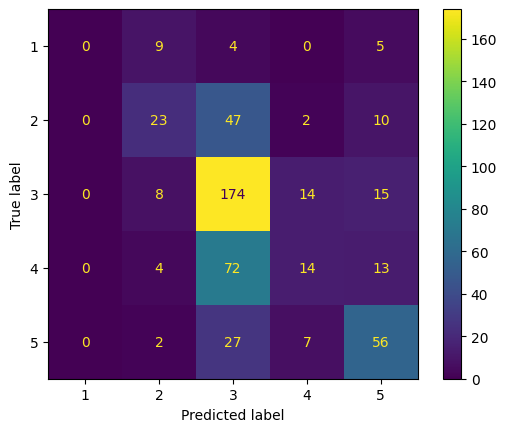

In [275]:
# Creating and displaying a confusion matrix for the classifier
matrix_calc = confusion_matrix(test_coherence, pred_coherence, labels = [1, 2, 3, 4, 5])
matrix = ConfusionMatrixDisplay(matrix_calc, display_labels = [1, 2, 3, 4, 5])
confusion_matrix_plot = matrix.plot()

In [276]:
# Creating and displaying a metric report for the classifier (precision, recall, F1 score, and macro/weighted averages)
report = classification_report(test_coherence, pred_coherence, target_names = ['1', '2', '3', '4', '5'], zero_division = 0.0)
print(report)

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        18
           2       0.50      0.28      0.36        82
           3       0.54      0.82      0.65       211
           4       0.38      0.14      0.20       103
           5       0.57      0.61      0.59        92

    accuracy                           0.53       506
   macro avg       0.40      0.37      0.36       506
weighted avg       0.48      0.53      0.48       506



### Conclusions
The resultant random forest classifier has an accuracy of approximately 50% - 53%. Given that this is a five-class classification problem, this is an improvement over the accuracy that would be expected with random chance selection (~20%). However, it does not approach the industry standards for model performance (~70%), suggesting that this model is not fully appropriate for classifying transcripts by coherence. The macro averages for precision, recall, and F1 score are low (typically < 0.40 for each metric), but are somewhat improved by calculating weighted averages. The highest performance metric is the weighted average of recall, which consistently remains above 0.50, but the combination of metrics demonstrate that the model is neither sufficiently precise nor able to identify all values within a class; the number of false positives and false negatives for most classes is high.

A feasible explanation for the poor performance of the model is class imbalance, as the gold standard ratings of coherence scores are not evenly distributed from 1 to 5. There are 54 transcripts with a coherence rating of 1, 247 with a rating of 2, 640 with a rating of 3, 312 with a rating of 4, and 279 with a rating of 5. The low number of transcripts with a score of 1 can result in significant underrepresentation of this set in both the training and testing data, even with a stratified splitting strategy. As indicated in the confusion matrix, the model does not often classify any transcript as having a score of 1, resulting in a zero value on each evaluation metric for this class. This would lead to the observed low macro averages, which do not account for the size of each supporting class. Moreover, the model has high recall for the class with a score of 3 (~0.80), and the confusion matrix indicates that it tends to classify transcripts as having a coherence score of 3, regardless of the true score. It is possible that the large number of transcripts with a score of 3 results in a bias towards this class, which would be highly represented in the training data. Consequently, the weighted averages (which place a high weight on this class due to more supporting instances) would be higher than the macro averages, particularly on recall (few false negatives for this label). This follows the pattern consistently observed from this random forest model, and is indicative of the need for a more complete dataset.

In addition, the chosen linguistic features themselves may not necessarily be appropriate or accurate indicators of narrative coherence. Although each feature was selected based on some form of theoretical support or speaker intuition, no formal correlation or statistical analysis was completed prior to fitting the classification model. It is therefore possible that these features are not capturing an aspect of the language which would be heavily weighted in human ratings of coherence, resulting in the observed inaccurate performance of the model. A potential extension of this project would be the use of a more rigorous feature selection process to determine which are the optimal indicators of the provided coherence scores.

For answers to the reflection questions, see [this file](Reflection.md).